In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from scipy import stats

# Pivot #

In [44]:
(np.arange(1,7),10)

(array([1, 2, 3, 4, 5, 6]), 10)

In [2]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY')

In [3]:
nba.show(20)

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Each player has two categorical attributes, Position and Team (actually three, because their name is also categorical). 

In [4]:
# Count how many players are in each Position/Team pair
# Two required arguments:
# First is the column label of the attribute 
# whose values are the column labels of the pivot table
# Second is the label for the rows

# Each cell contains the number of players in that Position/Team category.
# Go back to nba and check that there are 3 Centers in the Atlanta Hawks.

nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [5]:
nba.pivot('TEAM', 'POSITION')

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,3,3,1,3,2,4,2,4,3,3,1,2,1,2,2,0,1,3,3,1,2,1,2,2,3,3,3,3,3,3
PF,2,2,3,3,2,1,2,2,0,3,4,3,2,4,7,3,2,3,3,4,3,5,4,3,3,0,2,4,3,3
PG,2,4,2,4,2,3,4,2,1,2,2,2,3,1,4,2,4,3,4,3,3,4,1,4,1,2,3,5,5,3
SF,2,2,2,2,2,1,1,4,4,4,2,4,2,3,4,4,3,2,3,3,4,1,3,2,2,3,3,3,3,4
SG,5,4,5,6,4,1,2,2,2,2,3,2,5,1,4,3,3,2,3,2,4,3,3,6,5,3,2,2,3,4


In [6]:
# This one is easier to read

nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


Optionally, you can ask pivot to do the following: for each Position/Team combo, find all the **values** of another attribute and **collect** them in some way; display this in the cell.

- The `values` argument has to be the column label of the new attribute
- The `collect` argument has to be the name of a function

In [7]:
# List the players in each Position/Team combo

nba.pivot('POSITION', 'TEAM', values = 'PLAYER', collect = list)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,"['Al Horford', 'Tiago Splitter', 'Walter Tavares']","['Paul Millsap', 'Mike Scott']","['Jeff Teague', 'Dennis Schroder']","['Thabo Sefolosha', 'Kent Bazemore']","['Kyle Korver', 'Tim Hardaway Jr.', 'Jason Richardson', ..."
Boston Celtics,"['Tyler Zeller', 'Jared Sullinger', 'Kelly Olynyk']","['Jonas Jerebko', 'Jordan Mickey']","['Avery Bradley', 'Isaiah Thomas', 'Marcus Smart', 'Terr ...","['Jae Crowder', 'Perry Jones']","['Evan Turner', 'James Young', 'Zoran Dragic', 'R.J. Hun ..."
Brooklyn Nets,['Andrea Bargnani'],"['Thaddeus Young', 'Chris McCullough', 'Thomas Robinson']","['Jarrett Jack', 'Shane Larkin']","['Joe Johnson', 'Earl Clark']","['Bojan Bogdanovic', 'Sergey Karasev', 'Wayne Ellington' ..."
Charlotte Hornets,"['Al Jefferson', 'Cody Zeller', 'Frank Kaminsky III']","['Marvin Williams', 'Spencer Hawes', 'Tyler Hansbrough']","['Kemba Walker', 'Brian Roberts', 'Jeremy Lin', 'Jorge G ...","['Michael Kidd-Gilchrist', 'P.J. Hairston']","['Nicolas Batum', 'Courtney Lee', 'Jeremy Lamb', 'Damien ..."
Chicago Bulls,"['Joakim Noah', 'Pau Gasol']","['Nikola Mirotic', 'Bobby Portis']","['Derrick Rose', 'Aaron Brooks']","['Doug McDermott', 'Tony Snell']","['Jimmy Butler', 'Mike Dunleavy', 'Kirk Hinrich', ""E'Twa ..."
Cleveland Cavaliers,"['Tristan Thompson', 'Brendan Haywood', 'Timofey Mozgov' ...",['Kevin Love'],"['Kyrie Irving', 'Mo Williams', 'Matthew Dellavedova']",['LeBron James'],['Iman Shumpert']
Dallas Mavericks,"['Zaza Pachulia', 'JaVale McGee']","['David Lee', 'Dirk Nowitzki']","['Deron Williams', 'J.J. Barea', 'Devin Harris', 'Raymon ...",['Chandler Parsons'],"['Justin Anderson', 'John Jenkins']"
Denver Nuggets,"['JJ Hickson', 'Jusuf Nurkic', 'Joffrey Lauvergne', 'Nik ...","['Kenneth Faried', 'Darrell Arthur']","['Jameer Nelson', 'Emmanuel Mudiay']","['Danilo Gallinari', 'Wilson Chandler', 'Will Barton', ' ...","['Gary Harris', 'Sean Kilpatrick']"
Detroit Pistons,"['Aron Baynes', 'Andre Drummond', 'Joel Anthony']",None,['Reggie Jackson'],"['Stanley Johnson', 'Danny Granger', 'Reggie Bullock', ' ...","['Jodie Meeks', 'Kentavious Caldwell-Pope']"
Golden State Warriors,"['Andrew Bogut', 'Marreese Speights', 'Festus Ezeli']","['Draymond Green', 'Jason Thompson', 'Anderson Varejao']","['Stephen Curry', 'Shaun Livingston']","['Andre Iguodala', 'Harrison Barnes', 'Brandon Rush', 'K ...","['Klay Thompson', 'Leandro Barbosa']"


In [8]:
# total salary in each Position/Team combo

nba.pivot('POSITION', 'TEAM', values ='SALARY', collect = sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


In [9]:
# You don't have to type "values = ..." and "collect = "
# But you MUST put the arguments in the correct order

nba.pivot('POSITION', 'TEAM', 'SALARY', sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


In [10]:
# Median salary in each Position/Team combo

nba.pivot('POSITION', 'TEAM', 'SALARY', np.median)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,9.75625,11.0025,4.8817,3,0.947276
Boston Celtics,2.56926,3.08548,5.17195,4.41716,1.72803
Brooklyn Nets,1.3629,1.14024,3.9,13.0403,1.5
Charlotte Hornets,4.2042,6.11003,2.49697,3.76642,1.99082
Chicago Bulls,10.4244,3.46744,11.1715,1.95816,3.67747
Cleveland Cavaliers,7.73625,19.689,2.1,22.9705,8.98876
Dallas Mavericks,3.23548,11.9135,4.17172,15.3615,1.21517
Denver Nuggets,1.77586,7.02498,3.72362,6.99139,0.841949
Detroit Pistons,3.27209,0,13.913,1.71145,4.58088
Golden State Warriors,3.815,7.00847,8.45726,2.57218,9.0005


In [11]:
# This function returns the distance between the max and the min of a list/array

def data_range(x):
    return max(x) - min(x)

In [12]:
# You can use your own function as the collect
# Distance between the max salary and min salary in each Position/Team combo

nba.pivot('POSITION', 'TEAM', 'SALARY', data_range)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,11,15.3383,6.2366,2,5.22139
Boston Celtics,0.451815,3.82904,5.90598,4.75791,2.27687
Brooklyn Nets,0,10.2546,4.8,23.7091,2.58045
Charlotte Hornets,10.8875,6.05272,11.0527,5.12996,12.6002
Chicago Bulls,5.95124,4.15257,17.8431,0.84456,15.3921
Cleveland Cavaliers,12.9849,0,15.2602,0,0
Dallas Mavericks,3.92904,7.16035,1.42866,0,0.467652
Denver Nuggets,4.3135,8.42196,1.24276,13.1997,1.48506
Detroit Pistons,4,0,0,2.24196,3.37824
Golden State Warriors,11.7913,13.9711,5.82706,10.5785,13.001


# Hypothesis Testing #

## Sample in Two Categories ##

## Example 1 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Mo: Are you kidding? It's late more often than that!

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of "late" is more than 70%

Test statistic: All of the following are fine:
percent late - 70; number of days late - 140; number of days late; percent of days late; proportion of days late

(For the P-value) Direction that supports alternative: For each of these statistics, positive values or large values support the alternative. So look right.

## Example 2 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Po: Jo, stop whining. It's not late that often.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late < 70%

Test statistic: Same as in Example 1:
percent late - 70; number of days late - 140; number of days late; percent of days late; proportion of days late

(For the P-value) Direction that supports alternative: For each of these statistics, negative values or small values support the alternative. So look left

## Example 2 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Bo: Jo, that's just not true.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late is not 70%

Test statistic: |number of days late - 140|; |percent days late - 70|; |proportion of days late - 0.7|; also TVD, but see below.

(For the P-value) Direction that supports alternative: Big distances support the alternative. So look right

In [13]:
# The simulation will be under the null hypothesis.

null_proportions = make_array(0.7, 0.3)

In [14]:
# Suppose we choose |proportion late - .7| as the test statistic.
# Define a function that simulates ONE value of this statistic under the null

# This code depends on the null hypothesis and the choice of statistic.

def distance_under_null():
    proportion_late = sample_proportions(200, null_proportions).item(0)
    return abs(proportion_late - 0.7)

# Note: If you want to use counts instead of proportions, multiply by sample size
# If you want to use percents instead of proportions, multiply by 100

In [15]:
# Simulate 10,000 values of the test statistic
# and collect them in an array.
# This code always looks the same.

distances = make_array()
for i in np.arange(10000):
    distances = np.append(distances, distance_under_null())

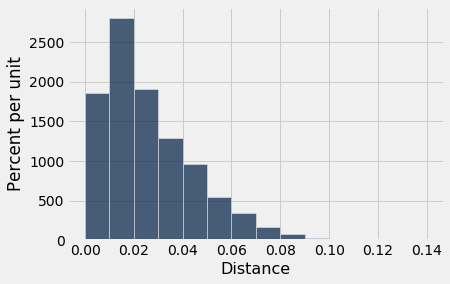

In [16]:
# If the null is true, this is how the statistic should behave

distance_tbl = Table().with_column('Distance', distances)
distance_tbl.hist(bins=np.arange(0, 0.14, 0.01))

In [17]:
# Until now, we haven't needed to use what was actually observed.
# But at this point we have to compare the null prediction with the observed statistic.

# Suppose the data are 150 times late out of 200 times

observed_statistic = abs(150/200 - .7)
observed_statistic

0.050000000000000044

In [18]:
empirical_p = np.count_nonzero(distances >= observed_statistic) / 10000
empirical_p

0.1198

Interpreting the P-value:
It is the chance, assuming that the bus is late 70% of the time, that we get a statistic that is 0.05 or greater.

That chance is 12.4%, which is substantial. So if the null is true there is a decent chance of getting the statistic that was actually observed or one that looks even more like the alternative. So the data are consistent with the null.

In [19]:
# Want to use the TVD as the statistic?
# Go ahead:

(abs(0.75 - .7) + abs(.25 - .3)) / 2

0.05000000000000002

When there are just two categories of data, the TVD is equal to the distance between one of the proportions and the corresponding proportion in the null. In other words, the simple distance we calculated as our statistic is actually the TVD. 

## Sample in Multiple Categories ##

Jo: Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.

Po: No it doesn't.

Data: Watch bus for 200 days, note arrivals in the three categories

Null: Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.

Alternative: The null model is wrong.

Test statistic: TVD. It has to be a distance (because "wrong"), and it has to measure the distance between two categorical distributions, not two numbers.

(For the P-value) Direction that supports alternative: Big distances support the alternative. Look right.

In [20]:
null_proportions = make_array(0.5, 0.2, 0.3)

def tvd_under_null():
    in_sample = sample_proportions(200, null_proportions)
    return sum(abs(in_sample - null_proportions))/2

In [21]:
tvds = make_array()
for i in np.arange(10000):
    tvds = np.append(tvds, tvd_under_null())

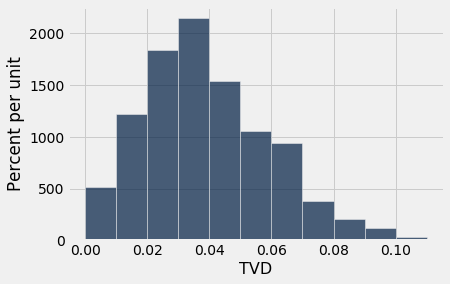

In [22]:
tvd_tbl = Table().with_column('TVD', tvds)
tvd_tbl.hist(bins=np.arange(0, .12, 0.01))

In [23]:
# This above is the prediction made by the null hypothesis.
# Compare with the data:
# Suppose the data are 90 times a bit late, 60 times very late, 50 times on time

observed_proportions = make_array(90, 60, 50)/200
observed_tvd = sum(abs(observed_proportions - null_proportions))/2
observed_tvd

0.09999999999999998

In [24]:
empirical_p = np.count_nonzero(tvds >= observed_tvd)/10000
empirical_p

0.0076

Conclusion of test: The data support the hypothesis that the null model is wrong.

Notice that when we had a more crude model ("late 70% of the time") compared to this one ("a bit late 50% of the time, very late 20% of the time, on time 30%), the percent late was 70% in both cases. The observed data were also consistent with each other: 150 late out of 200, compared to 90 "a bit late", 60 "very late", and 50 "on time". The latter is still 150 late.

The tests said the data are consistent with 70% late, but not with 50% a bit late, 20% very late, and 30% on time. That's not surprising. Often, the more detailed specifications you have in your model, the less likely you are to see all of that in the data even if the model is good.

## A/B Testing: Example ##

In [25]:
births = Table.read_table('baby.csv')

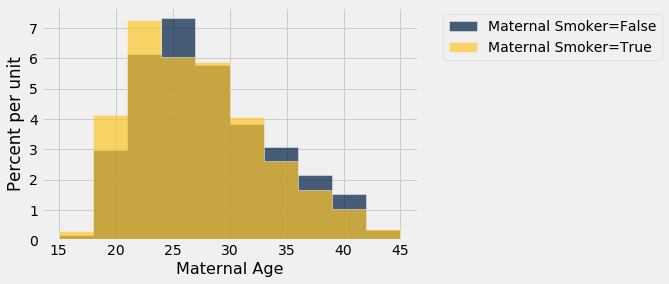

In [26]:
births.hist('Maternal Age', group='Maternal Smoker')

Null: The age distribution in the smokers' population is the same as the age distribution in the non-smoker's population.

(Note: In the case of an RCT, this would be: The distribution of all potential treatment scores is the same as the distribution of all potential control scores. Or simply, the treatment does nothing.)

Alternative: Depends on the question, but suppose the question asks whether the smokers are younger. Then the alternative is that the smokers are younger, on average, than the nonsmokers.

Test statistic: smokers' average - nonsmokers' average; nonsmokers' average - smokers' average

(For the P-value) Direction that supports the alternative: If you use the first statistic, negative values support the alternative, so look left. If you use the second statistic, positive values support the alternative, so look right.

## Calculating the Observed Statistic ##
This can be left till the end, but doing it now will help us understand how to code the simulation under the null.

In [27]:
# This just selects only the two relevant columns; you don't have to do this.

ages = births.select('Maternal Age', 'Maternal Smoker')
ages = ages.relabeled(0, 'Age').relabeled(1, 'Smoker')

In [28]:
ages

Age,Smoker
27,False
33,False
28,True
23,True
25,False
33,False
23,False
25,False
30,True
27,False


In [29]:
# The group means in a table

means_table = ages.group('Smoker', np.average)
means_table

Smoker,Age average
False,27.5441
True,26.7364


In [30]:
# Extract the difference between the two means
# Note that we have calculated smokers' mean - nonsmokers' mean
# So we will be looking left for the P-value

means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-0.8076725017901509

## Simulating Under the Null ##

In [31]:
ages

Age,Smoker
27,False
33,False
28,True
23,True
25,False
33,False
23,False
25,False
30,True
27,False


In [32]:
# This permutes (shuffles) all the rows

ages.sample(with_replacement=False)

Age,Smoker
22,True
27,True
21,False
41,False
29,False
23,True
20,False
44,False
31,False
40,False


In [33]:
# All we want are the shuffled labels
shuffled_labels = ages.sample(with_replacement=False).column(1)
shuffled_labels

array([False,  True, False, ..., False, False,  True])

In [34]:
# Attach the shuffled labels to the original ages

shuffled_table = ages.select('Age').with_column('Shuffled Label', shuffled_labels)
shuffled_table

Age,Shuffled Label
27,False
33,True
28,False
23,False
25,False
33,False
23,False
25,True
30,False
27,False


In [35]:
# Now do exactly what you did to find the observed statistic,
# but with this new shuffled_table

# The shuffled group means in a table
shuffled_means_table = shuffled_table.group('Shuffled Label', np.average)

# The difference between the two shuffled group means
shuffled_means = shuffled_means_table.column(1)
shuffled_difference = shuffled_means.item(1) - shuffled_means.item(0)
shuffled_difference

0.44078797019973237

In [36]:
# Put it all together in a function.
# I just copy-pasted

def one_shuffled_difference():
    shuffled_labels = ages.sample(with_replacement=False).column(1)
    shuffled_table = ages.select('Age').with_column('Shuffled Label', shuffled_labels)
    shuffled_means_table = shuffled_table.group('Shuffled Label', np.average)
    shuffled_means = shuffled_means_table.column(1)
    return shuffled_means.item(1) - shuffled_means.item(0)   

In [37]:
# Our old friends the for loop and collection array
# This one takes a while to run.

differences = make_array()
for i in np.arange(5000):
    differences = np.append(differences, one_shuffled_difference())

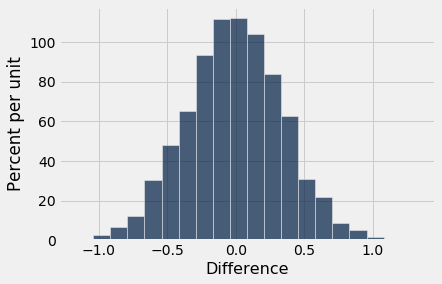

In [38]:
# Our old friend the predicted distribution of the statistic under the null

diff_table = Table().with_column('Difference', differences)
diff_table.hist(bins=20)

In [39]:
# Our old friend the P-value

np.count_nonzero(differences <= observed_difference)/5000

0.0122

With a 5% cutoff, you would pick the alternative over the null. 

In [40]:
# In lecture we said that all you have to do is pick the right numbers
# of random "smokers" and "nonsmokers"
# to form your two "shuffled" groups

ages.group('Smoker')

Smoker,count
False,715
True,459


Shuffling the labels is one clear way, as it demonstrates the idea behind the simulation and more importantly is certain to preserve the two sample sizes.